In [1]:
%matplotlib notebook
import numpy as np, sympy as sp
import matplotlib.pyplot as plt, matplotlib
from ipywidgets import interactive 
from scipy.misc import derivative
import math
from typing import List   
from matplotlib.lines import Line2D

# Part 1:

## 1) Implement Taylor Polynomial. Input: f(x), c, n. Output: P_n(x)
## 2) Implement Maclaurin Polynomial. Input: f(x), n. Output: P_n(x)
## 3) Bonus: Comparing the graphs of f(x) and P_n(x)

In [2]:
x = sp.Symbol('x')

In [3]:
class Taylor():
    
    def __init__(self, 
                 function, 
                 order, 
                 center = 0):
        
        self.center = center
        self.function = function 
        self.order = order
        self.d_pts = order * 2
        self.coefficients = []

        if self.d_pts % 2 == 0: self.d_pts += 1

        self.__get_coefficients()

    def __get_coefficients(self):
        
        for i in range(0, self.order+1):
            self.coefficients.append(round(derivative(self.function,
                                                      self.center, 
                                                      n = i, 
                                                      order = self.d_pts)/math.factorial(i), 5))

    def get_equation(self):
        
        eqn_string = ''
        
        for i in range(self.order + 1):
            
            if self.coefficients[i] != 0:
                eqn_string += str("{}".format(self.coefficients[i])) + ("*(x-{})^{}".format(self.center, i) if i > 0 else "" ) + "+" 
        eqn_string = eqn_string[:-3] if eqn_string.endswith("+") else eqn_string
        
        return eqn_string 



In [4]:
class Maclaurin():
    
    def __init__(self, 
                 function, 
                 order, 
                ):
        
        self.function = function 
        self.order = order
        self.d_pts = order * 2
        self.coefficients = []

        if self.d_pts % 2 == 0: self.d_pts += 1

        self.__get_coefficients()

    def __get_coefficients(self):
        
        for i in range(0, self.order+1):
            self.coefficients.append(round(derivative(self.function,
                                                      0, 
                                                      n = i, 
                                                      order = self.d_pts)/math.factorial(i), 5))

    def get_equation(self):
        
        eqn_string = ''
        
        for i in range(self.order + 1):
            
            if self.coefficients[i] != 0:
                eqn_string += str("{}".format(self.coefficients[i])) + ("*x^{}".format(i) if i > 0 else "" ) + "+" 
        eqn_string = eqn_string[:-3] if eqn_string.endswith("+") else eqn_string
        
        return eqn_string 



In [5]:
class Get_Input: 
    
    
    def __init__(self, f: str):
        self.f = f
        self.x = sp.Symbol('x') 
        self.mat_func = [
            'sin', 
            'cos', 
            'tan', 
            'arcsin', 
            'arccos', 
            'arctan',
            'sinh', 
            'cosh', 
            'tanh', 
            'arcsinh', 
            'arccosh', 
            'arctanh'
           ]
        
    
    def get_range(self):
        x_vals = []
        status = False
        for mt in self.mat_func:
            if mt in self.f:
                status = True
                break
        if status: x_vals = np.linspace(-np.pi, np.pi, 21) 
        else: x_vals = np.linspace(-5, 5, 21)
        
        return x_vals
        
        
    def get_f(self): 
        f = list(self.f)
        if 'e' in f:
            f[f.index('e')] = '2.718281828'
        f = ''.join([i for i in f])
        return sp.sympify(f)
    
    def get_lf(self): return(sp.lambdify(self.x, self.get_f()))
    
        
            

In [6]:
f = input('enter f(x) like: sin(x), e^x ... : ')

tn = int(input('n for taylor series: '))
mn = int(input('n for maclaurin series: '))
c = int(input('center: '))


ftrash = f
gi = Get_Input(f)
func = gi.get_f()
x_range = gi.get_range()
func = str(func)

enter f(x) like: sin(x), e^x ... : e^(-x^2)
n for taylor series: 4
n for maclaurin series: 4
center: 0


In [7]:
def function(val):
    return sp.sympify(func).subs(x, val)    

In [8]:
ts = Taylor(function, tn, c)
ts_func = ts.get_equation()
final_tayfunc = sp.sympify(ts_func)
ms = Maclaurin(function, mn)
ms_func = ms.get_equation()
final_macfunc = sp.sympify(ms_func)

In [9]:
original = [function(val) for val in x_range]
tay_x_vals = [final_tayfunc.subs(x, val) for val in x_range]
mac_x_vals = [final_macfunc.subs(x, val) for val in x_range]

In [10]:
def i_love_calculus():
    fig, axs = plt.subplots(nrows=2, ncols=2)
    font = {'weight': 'bold', 'size': 9}
    matplotlib.rc('font', **font)

#original
    axs[0, 0].set_title('f(x) = {}'.format(ftrash), 
                  fontsize=10, color = 'b')
    axs[0, 0].plot(x_range, original, color = 'b')
    axs[0, 0].spines["left"].set_position(("data", 0))
    axs[0, 0].spines["bottom"].set_position(("data", 0))
    axs[0, 0].spines["top"].set_visible(False)
    axs[0, 0].spines["right"].set_visible(False)

    
#     axs[0, 1].set_title('f(x) = {}'.format(final_tay_func), 
#                   fontsize=10, color = 'b', alpha=0.5)
    axs[0, 1].set_title("Taylor series", 
                  fontsize=10, color = 'g', alpha=0.5)
    axs[0, 1].plot(x_range, tay_x_vals, color = 'g')
    axs[0, 1].spines["left"].set_position(("data", 0))
    axs[0, 1].spines["bottom"].set_position(("data", 0))
    axs[0, 1].spines["top"].set_visible(False)
    axs[0, 1].spines["right"].set_visible(False)
    
#     axs[1, 0].set_title('f(x) = {}'.format(final_macfunc), 
#                   fontsize=10, color = 'b', alpha=0.5)    
    axs[1, 0].set_title("Maclaurin series", 
                  fontsize=10, color = 'r', alpha=0.5)
    axs[1, 0].plot(x_range, mac_x_vals, color = 'r')
    axs[1, 0].spines["left"].set_position(("data", 0))
    axs[1, 0].spines["bottom"].set_position(("data", 0))
    axs[1, 0].spines["top"].set_visible(False)
    axs[1, 0].spines["right"].set_visible(False)
    
#     axs[1, 1].set_title('f(x)={}, t(x)={}, m(x)={}'.format(func, final_tay_func,final_macfunc), 
#                   fontsize=10, color = 'b', alpha=0.5) 
    axs[1, 1].set_title("All function", 
                  fontsize=10, color = 'b', alpha=0.5)
    axs[1, 1].plot(x_range, original, color = 'b')
    axs[1, 1].plot(x_range, tay_x_vals, color = 'g')
    axs[1, 1].plot(x_range, mac_x_vals, color = 'r')
    axs[1, 1].spines["left"].set_position(("data", 0))
    axs[1, 1].spines["bottom"].set_position(("data", 0))
    axs[1, 1].spines["top"].set_visible(False)
    axs[1, 1].spines["right"].set_visible(False)

In [11]:
def tay_plot():
    font = {'weight': 'bold', 'size': 9}
    matplotlib.rc('font', **font)
    fig, ax = plt.subplots()
    ax.spines["left"].set_position(("data", 0))
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.plot(1, 0, ">k", transform = ax.get_yaxis_transform(), clip_on = False)
    ax.plot(0, 1, "^k", transform = ax.get_xaxis_transform(), clip_on = False)
    custom_lines = [Line2D([0], [0], color='b', lw=4),
                    Line2D([0], [0], color='g', lw=4)]
    
    plt.plot(x_range, tay_x_vals, color = 'g')
    plt.plot(x_range, original, color = 'b')
    ax.legend(custom_lines, ['f(x)={}'.format(ftrash), 'Taylor'])

In [12]:
def mac_plot():
    font = {'weight': 'bold', 'size': 9}
    matplotlib.rc('font', **font)
    fig, ax = plt.subplots()
    ax.spines["left"].set_position(("data", 0))
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.plot(1, 0, ">k", transform = ax.get_yaxis_transform(), clip_on = False)
    ax.plot(0, 1, "^k", transform = ax.get_xaxis_transform(), clip_on = False)
    custom_lines = [Line2D([0], [0], color='b', lw=4),
            Line2D([0], [0], color='r', lw=4)]

    plt.plot(x_range, mac_x_vals, color = 'r')
    plt.plot(x_range, original, color = 'b')
    ax.legend(custom_lines, ['f(x)={}'.format(ftrash), 'Maclaurin'])



In [13]:
def mac_and_tay_plot():
    font = {'weight': 'bold', 'size': 9}
    matplotlib.rc('font', **font)
    fig, ax = plt.subplots()
    ax.spines["left"].set_position(("data", 0))
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.plot(1, 0, ">k", transform = ax.get_yaxis_transform(), clip_on = False)
    ax.plot(0, 1, "^k", transform = ax.get_xaxis_transform(), clip_on = False)
    custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='g', lw=4)]

    
    plt.plot(x_range, tay_x_vals, color = 'g')
    plt.plot(x_range, mac_x_vals, color = 'r')
    plt.plot(x_range, original, color = 'b')
    ax.legend(custom_lines, ['f(x)={}'.format(ftrash), 'Maclaurin', 'Taylor'])


In [14]:
sp.sympify(ftrash)

e**(-x**2)

In [15]:
sp.sympify(final_tayfunc)

-0.83866*x**2 + 0.22891*x + 1.0

In [17]:
sp.sympify(final_macfunc)

0.00826*x**5 + 0.04168*x**4 + 0.16686*x**3 + 0.49999*x**2 + 1.00125*x + 1.0

<IPython.core.display.Javascript object>


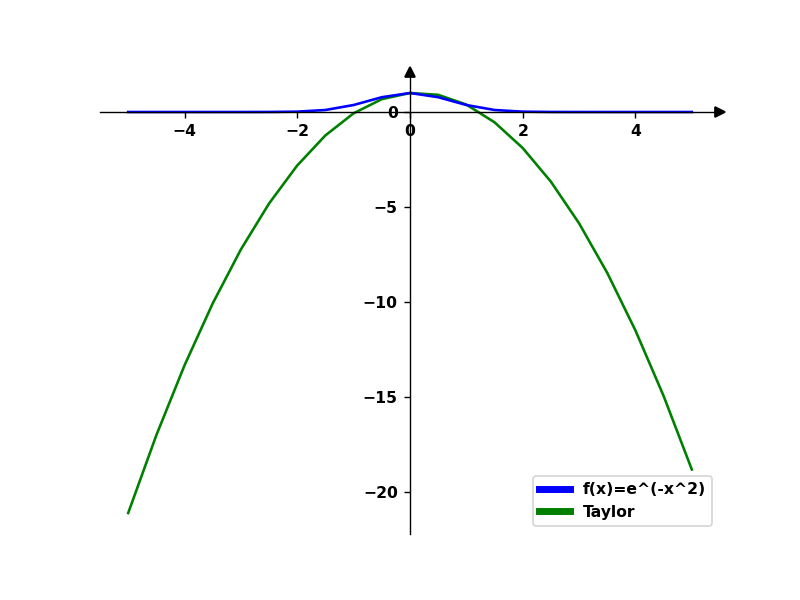

<IPython.core.display.Javascript object>


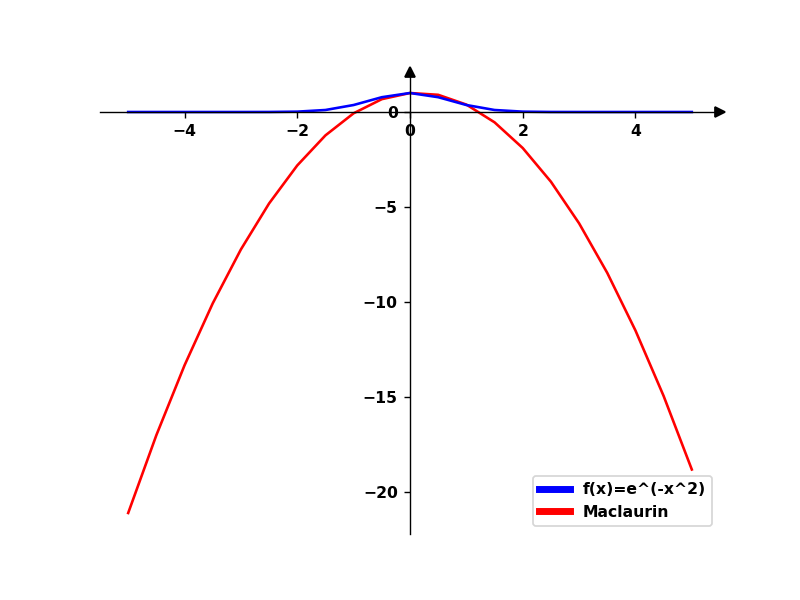

<IPython.core.display.Javascript object>


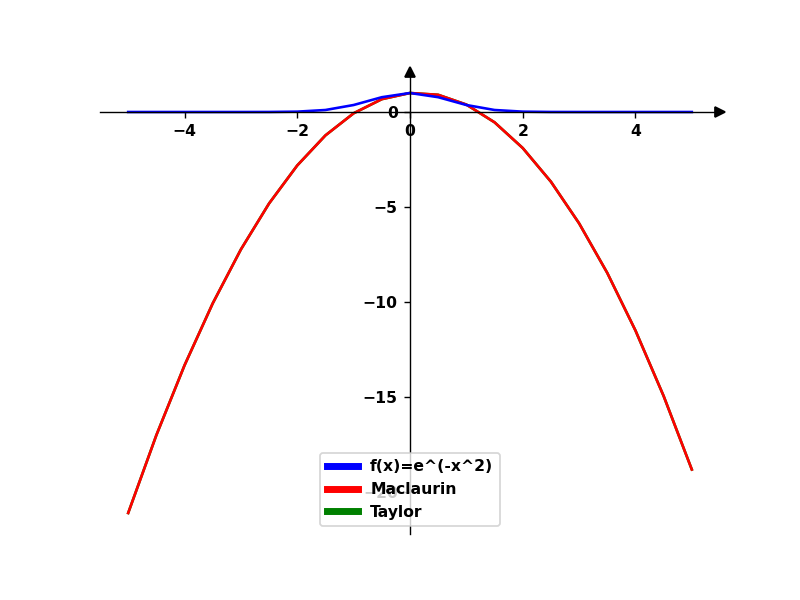

In [16]:
tay_plot()
mac_plot()
mac_and_tay_plot()

<IPython.core.display.Javascript object>


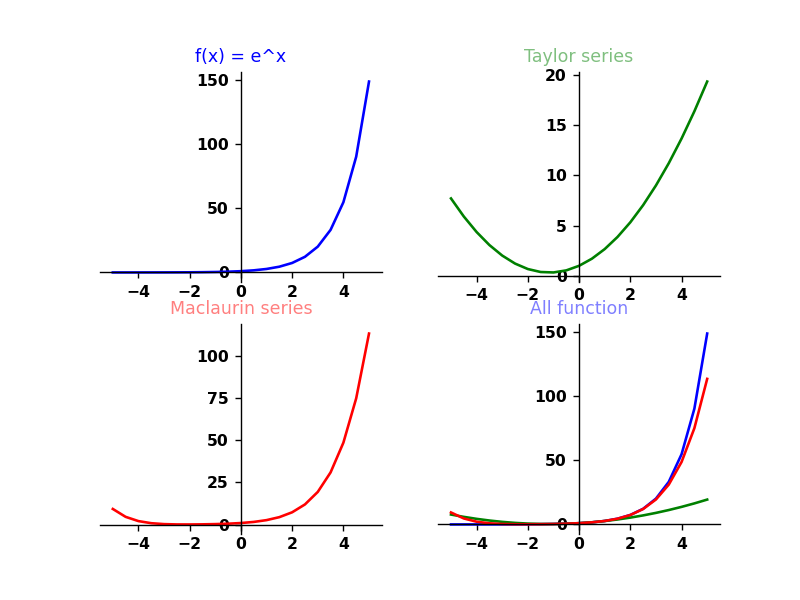

In [255]:
i_love_calculus()

# Part 2:
## 1) Approximate Pi using arctan1
## 2) Approximate Pi using Ramanujan's Series (page 663, Exercise:61)
## 3) Bonus: Compare these two approximations

In [25]:
print(22/7)

3.142857142857143


# hello Muso agai, please accept my late submission :)